<a href="https://colab.research.google.com/github/arunkumarseka/arunkumarseka/blob/main/Lung%20cancer%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import os
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.metrics import categorical_crossentropy
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from keras.models import Sequential, Model
#from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam
import cv2


In [ ]:

import os
#Root = "/content/drive/MyDrive/image dataset/Data "
#os.chdir(Root)

In [ ]:
data = '/content/drive/MyDrive/image dataset/Data'
test_img = '/content/drive/MyDrive/image dataset/Data/test'
train_img = '/content/drive/MyDrive/image dataset/Data/train'
valid_img ='/content/drive/MyDrive/image dataset/Data/valid'

In [ ]:
def GetDatasetSize(path):
    num_of_image = {}
    for folder in os.listdir(path):
        # Counting the Number of Files in the Folder
        num_of_image[folder] = len(os.listdir(os.path.join(path, folder)));
    return num_of_image;
    
train_set = GetDatasetSize(train_img)
val_set = GetDatasetSize(valid_img)
test_set = GetDatasetSize(test_img)
print(train_set,"\n\n",val_set,"\n\n",test_set)

{'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib': 195, 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa': 115, 'normal': 148, 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa': 155} 

 {'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa': 15, 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa': 21, 'normal': 13, 'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib': 23} 

 {'normal': 54, 'squamous.cell.carcinoma': 90, 'adenocarcinoma': 120, 'large.cell.carcinoma': 51}


for i in range(5):
    file = random.choice(os.listdir(adenocarcinoma))
    image_path= os.path.join(adenocarcinoma, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

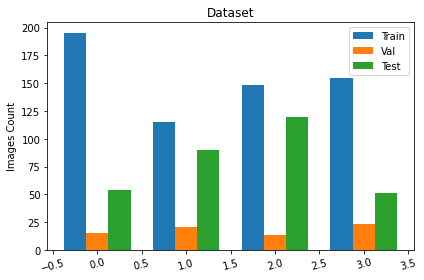

In [ ]:
labels = ['squamous.cell.carcinoma', 'normal', 'adenocarcinoma', 'large.cell.carcinoma']
train_list = list(train_set.values())
val_list = list(val_set.values())
test_list = list(test_set.values())

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, train_list, width, label='Train')
rects2 = ax.bar(x, val_list, width, label='Val')
rects3 = ax.bar(x + width, test_list, width, label='Test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Images Count')
ax.set_title('Dataset')
ax.set_xticks(x, labels)
plt.xticks(rotation=15)
ax.legend()

#ax.bar_label(rects1)
#ax.bar_label(rects2)
#ax.bar_label(rects3)

fig.tight_layout()

plt.show()


In [ ]:
import tensorflow.keras
from tensorflow.keras import layers
from tensorflow.keras import Model 
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Dense,Conv2D, Flatten, MaxPool2D, Dropout

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1.0/255.0,
                                  horizontal_flip = True,
                                  fill_mode = 'nearest',
                                  zoom_range=0.2,
                                  shear_range = 0.2,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  rotation_range=0.4)

train_data = train_datagen.flow_from_directory(train_img,
                                                   batch_size = 64,
                                                   target_size = (350,350),
                                                   class_mode = 'categorical')

Found 613 images belonging to 4 classes.


In [ ]:
train_data.class_indices

{'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib': 0,
 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa': 1,
 'normal': 2,
 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa': 3}

In [ ]:
val_datagen = ImageDataGenerator(rescale = 1.0/255.0)
val_data = val_datagen.flow_from_directory(valid_img,
                                                   batch_size = 64,
                                                   target_size = (350,350),
                                                   class_mode = 'categorical')

Found 72 images belonging to 4 classes.


In [ ]:
val_data.class_indices

{'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib': 0,
 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa': 1,
 'normal': 2,
 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa': 3}

In [ ]:

test_datagen = ImageDataGenerator(rescale = 1.0/255.0)
test_data = test_datagen.flow_from_directory(test_img,
                                                   batch_size = 64,
                                                   target_size = (350,350),
                                                   class_mode = 'categorical')

Found 315 images belonging to 4 classes.


In [ ]:
test_data.class_indices

{'adenocarcinoma': 0,
 'large.cell.carcinoma': 1,
 'normal': 2,
 'squamous.cell.carcinoma': 3}

In [ ]:

##xception
base_model=tf.keras.applications.Xception(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)
print(base_model.summary())

91897856/91884032 [==============================] - 0s 0us/step
Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 149, 149, 32  128        ['block1_conv1[0][0]']           
 ation)                   

In [ ]:

tf.keras.applications.xception.preprocess_input


<function keras.applications.xception.preprocess_input>

In [ ]:
NUM_CLASSES = 4
from tensorflow.keras import layers
xception_model = Sequential()
xception_model.add(base_model)
xception_model.add(layers.Flatten())
xception_model.add(layers.Dropout(0.25))
xception_model.add(layers.Dense(NUM_CLASSES, activation='elu'))

xception_model.layers[0].trainable = False

xception_model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

xception_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 1000)              22910480  
                                                                 
 flatten (Flatten)           (None, 1000)              0         
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 dense (Dense)               (None, 4)                 4004      
                                                                 
Total params: 22,914,484
Trainable params: 4,004
Non-trainable params: 22,910,480
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
mc = ModelCheckpoint(
    filepath="./ct_xception_best_model.hdf5",
    monitor= 'val_accuracy', 
    verbose= 1,
    save_best_only= True, 
    mode = 'auto'
    );

call_back = [ mc];

In [ ]:
xception = xception_model.fit(
    train_data, 
    steps_per_epoch = train_data.samples//train_data.batch_size, 
    epochs = 60, 
    validation_data = val_data, 
    validation_steps = val_data.samples//val_data.batch_size,
    callbacks = call_back 
    )

Epoch 1/60
9/9 [==============================] - ETA: 0s - loss: 3.1124 - accuracy: 0.4426
Epoch 1: val_accuracy did not improve from 0.46875
9/9 [==============================] - 21s 2s/step - loss: 3.1124 - accuracy: 0.4426 - val_loss: 4.2375 - val_accuracy: 0.3281
Epoch 2/60
9/9 [==============================] - ETA: 0s - loss: 3.5132 - accuracy: 0.4427
Epoch 2: val_accuracy did not improve from 0.46875
9/9 [==============================] - 20s 2s/step - loss: 3.5132 - accuracy: 0.4427 - val_loss: 4.4512 - val_accuracy: 0.2812
Epoch 3/60
9/9 [==============================] - ETA: 0s - loss: 4.7761 - accuracy: 0.4427
Epoch 3: val_accuracy did not improve from 0.46875
9/9 [==============================] - 20s 2s/step - loss: 4.7761 - accuracy: 0.4427 - val_loss: 4.2341 - val_accuracy: 0.3281
Epoch 4/60
9/9 [==============================] - ETA: 0s - loss: 4.8855 - accuracy: 0.4299
Epoch 4: val_accuracy did not improve from 0.46875
9/9 [==============================] - 19s 2s/s

In [ ]:
xception_model = load_model("./ct_xception_best_model.hdf5")

In [ ]:
accuracy_xception = xception_model.evaluate_generator(generator= test_data)[1] 
print(f"The accuracy of the model is = {accuracy_xception*100} %")

The accuracy of the model is = 48.88888895511627 %


In [ ]:
xception.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
'''acc = xception.history['accuracy']
val_acc = xception.history['val_accuracy']
loss = xception.history['loss']
val_loss = xception.history['val_loss']
epochs_range = range(11, len(xception.epoch) + 1)

plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()'''

'acc = xception.history[\'accuracy\']\nval_acc = xception.history[\'val_accuracy\']\nloss = xception.history[\'loss\']\nval_loss = xception.history[\'val_loss\']\nepochs_range = range(11, len(xception.epoch) + 1)\n\nplt.figure(figsize=(10,5))\n\nplt.subplot(1, 2, 1)\nplt.plot(epochs_range, acc, label=\'Train Set\')\nplt.plot(epochs_range, val_acc, label=\'Val Set\')\nplt.legend(loc="best")\nplt.xlabel(\'Epochs\')\nplt.ylabel(\'Accuracy\')\nplt.title(\'Model Accuracy\')\n\nplt.subplot(1, 2, 2)\nplt.plot(epochs_range, loss, label=\'Train Set\')\nplt.plot(epochs_range, val_loss, label=\'Val Set\')\nplt.legend(loc="best")\nplt.xlabel(\'Epochs\')\nplt.ylabel(\'Loss\')\nplt.title(\'Model Loss\')\n\nplt.tight_layout()\nplt.show()'

In [ ]:
#densenet121
import tensorflow 

import pandas as pd
import numpy as np
import os
import keras
import random
import cv2
import math
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Convolution2D,BatchNormalization
from tensorflow.keras.layers import Flatten,MaxPooling2D,Dropout,AveragePooling2D,GlobalMaxPooling2D

from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input


from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array

from tensorflow.keras.models import Model

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

import warnings
warnings.filterwarnings("ignore")


In [ ]:
print("Tensorflow-version:", tensorflow.__version__)

Tensorflow-version: 2.8.0


In [ ]:
base_model=DenseNet121(weights='imagenet',include_top=False, input_shape=(350, 350, 3)) 

x=base_model.output


29097984/29084464 [==============================] - 0s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False
    

In [ ]:
model_densenet121 = Sequential() 


model_densenet121.add(Conv2D(filters=32, kernel_size= (3,3), activation= 'relu', input_shape=(350,350,3)) )

model_densenet121.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu' ))
model_densenet121.add(MaxPool2D(pool_size=(2,2)))

model_densenet121.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu' ))
model_densenet121.add(MaxPool2D(pool_size=(2,2)))

model_densenet121.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu' ))
model_densenet121.add(MaxPool2D(pool_size=(2,2)))

model_densenet121.add(Dropout(rate=0.25))

model_densenet121.add(Flatten())
model_densenet121.add(Dense(units=64, activation='relu'))
model_densenet121.add(Dropout(rate=0.25))
model_densenet121.add(Dense(units=4, activation='sigmoid'))

model_densenet121.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']  )
 
model_densenet121.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 348, 348, 32)      896       
                                                                 
 conv2d_5 (Conv2D)           (None, 346, 346, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 173, 173, 32)     0         
 )                                                               
                                                                 
 conv2d_6 (Conv2D)           (None, 171, 171, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 85, 85, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 83, 83, 128)      

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
mc = ModelCheckpoint(
    filepath="./ct_densenet121_best_model.hdf5",
    monitor= 'val_accuracy', 
    verbose= 1,
    save_best_only= True, 
    mode = 'auto'
    );

call_back = [ mc];

In [ ]:
# Fitting the Model

densnet121 = model_densenet121.fit(
    train_data, 
    steps_per_epoch = train_data.samples//train_data.batch_size, 
    epochs = 20, 
    validation_data = val_data, 
    validation_steps = val_data.samples//val_data.batch_size,
    callbacks = call_back 
    )

Epoch 1/20
9/9 [==============================] - ETA: 0s - loss: 1.8726 - accuracy: 0.2495
Epoch 1: val_accuracy improved from -inf to 0.20312, saving model to ./ct_densenet121_best_model.hdf5
9/9 [==============================] - 25s 2s/step - loss: 1.8726 - accuracy: 0.2495 - val_loss: 1.4042 - val_accuracy: 0.2031
Epoch 2/20
9/9 [==============================] - ETA: 0s - loss: 1.2830 - accuracy: 0.3443
Epoch 2: val_accuracy improved from 0.20312 to 0.21875, saving model to ./ct_densenet121_best_model.hdf5
9/9 [==============================] - 18s 2s/step - loss: 1.2830 - accuracy: 0.3443 - val_loss: 1.4654 - val_accuracy: 0.2188
Epoch 3/20
9/9 [==============================] - ETA: 0s - loss: 1.2106 - accuracy: 0.4627
Epoch 3: val_accuracy improved from 0.21875 to 0.48438, saving model to ./ct_densenet121_best_model.hdf5
9/9 [==============================] - 18s 2s/step - loss: 1.2106 - accuracy: 0.4627 - val_loss: 1.2030 - val_accuracy: 0.4844
Epoch 4/20
9/9 [===============

In [ ]:
from tensorflow.keras.models import load_model, Model

model = load_model("./ct_densnet121_model.hdf5")

In [ ]:
model = load_model("./ct_densenet121_best_model.hdf5")

In [ ]:
accuracy_densenet121 = model.evaluate_generator(generator= test_data)[1] 
print(f"The accuracy of the model is = {accuracy_densenet121*100} %")

The accuracy of the model is = 55.23809790611267 %


In [ ]:
densnet121.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
'''acc = densnet121.history['accuracy']
val_acc = densnet121.history['val_accuracy']
loss = densnet121.history['loss']
val_loss = densnet121.history['val_loss']
epochs_range = range(11, len(densnet121.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()'''

'acc = densnet121.history[\'accuracy\']\nval_acc = densnet121.history[\'val_accuracy\']\nloss = densnet121.history[\'loss\']\nval_loss = densnet121.history[\'val_loss\']\nepochs_range = range(11, len(densnet121.epoch) + 1)\n\nplt.figure(figsize=(15,5))\n\nplt.subplot(1, 2, 1)\nplt.plot(epochs_range, acc, label=\'Train Set\')\nplt.plot(epochs_range, val_acc, label=\'Val Set\')\nplt.legend(loc="best")\nplt.xlabel(\'Epochs\')\nplt.ylabel(\'Accuracy\')\nplt.title(\'Model Accuracy\')\n\nplt.subplot(1, 2, 2)\nplt.plot(epochs_range, loss, label=\'Train Set\')\nplt.plot(epochs_range, val_loss, label=\'Val Set\')\nplt.legend(loc="best")\nplt.xlabel(\'Epochs\')\nplt.ylabel(\'Loss\')\nplt.title(\'Model Loss\')\n\nplt.tight_layout()\nplt.show()'

In [ ]:
#cnn model
model = Sequential() 

# Convolutional Layer with input shape (350,350,3)
model.add(Conv2D(filters=32, kernel_size= (3,3), activation= 'relu', input_shape=(350,350,3)) )

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=4, activation='sigmoid'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']  )
 
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 348, 348, 32)      896       
                                                                 
 conv2d_9 (Conv2D)           (None, 346, 346, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 173, 173, 32)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 171, 171, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 85, 85, 64)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 83, 83, 128)      

In [ ]:

mc = ModelCheckpoint(
    filepath="./ct_cnn_best_model.hdf5",
    monitor= 'val_accuracy', 
    verbose= 1,
    save_best_only= True, 
    mode = 'auto'
    );

call_back = [mc];

In [ ]:
cnn = model.fit(
    train_data, 
    steps_per_epoch = train_data.samples//train_data.batch_size, 
    epochs = 20, 
    validation_data = val_data, 
    validation_steps = val_data.samples//val_data.batch_size,
    callbacks = call_back
    )

Epoch 1/20
9/9 [==============================] - ETA: 0s - loss: 2.4371 - accuracy: 0.3097
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to ./ct_cnn_best_model.hdf5
9/9 [==============================] - 19s 2s/step - loss: 2.4371 - accuracy: 0.3097 - val_loss: 1.4040 - val_accuracy: 0.5000
Epoch 2/20
9/9 [==============================] - ETA: 0s - loss: 1.2926 - accuracy: 0.3825
Epoch 2: val_accuracy did not improve from 0.50000
9/9 [==============================] - 18s 2s/step - loss: 1.2926 - accuracy: 0.3825 - val_loss: 1.2782 - val_accuracy: 0.4375
Epoch 3/20
9/9 [==============================] - ETA: 0s - loss: 1.1267 - accuracy: 0.4670
Epoch 3: val_accuracy improved from 0.50000 to 0.51562, saving model to ./ct_cnn_best_model.hdf5
9/9 [==============================] - 20s 2s/step - loss: 1.1267 - accuracy: 0.4670 - val_loss: 0.9677 - val_accuracy: 0.5156
Epoch 4/20
9/9 [==============================] - ETA: 0s - loss: 1.0685 - accuracy: 0.4991
Epoch 4: 

In [ ]:
model = load_model("./ct_cnn_best_model.hdf5")


In [ ]:
accuracy_cnn = model.evaluate_generator(generator= test_data)[1] 
print(f"The accuracy of the model is = {accuracy_cnn*100} %")

The accuracy of the model is = 57.777780294418335 %


In [ ]:
cnn.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

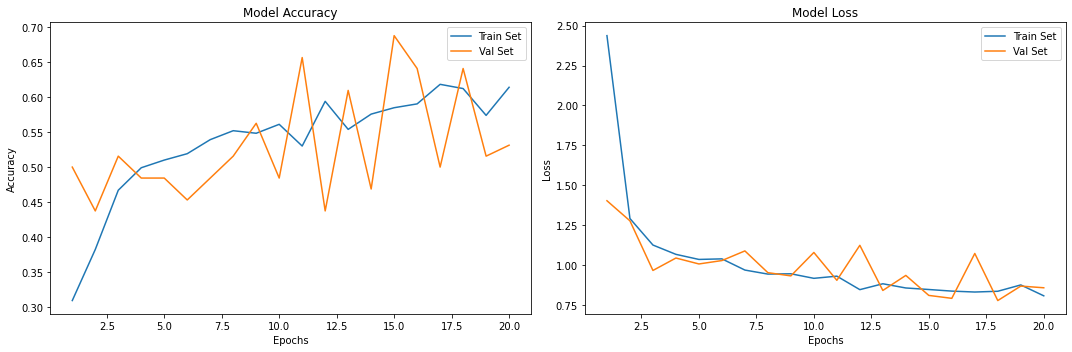

In [ ]:
acc = cnn.history['accuracy']
val_acc = cnn.history['val_accuracy']
loss = cnn.history['loss']
val_loss = cnn.history['val_loss']
epochs_range = range(1, len(cnn.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

In [ ]:
#VGG 16 MODEL


In [ ]:
base_model = VGG16(
    weights='imagenet',
    include_top=False, 
    input_shape=(350,350,3)
)

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
NUM_CLASSES = 4

vgg_model = Sequential()
vgg_model.add(base_model)
vgg_model.add(layers.Flatten())
vgg_model.add(layers.Dropout(0.25))
vgg_model.add(layers.Dense(NUM_CLASSES, activation='sigmoid'))

vgg_model.layers[0].trainable = False

vgg_model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

vgg_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 10, 10, 512)       14714688  
                                                                 
 flatten_3 (Flatten)         (None, 51200)             0         
                                                                 
 dropout_5 (Dropout)         (None, 51200)             0         
                                                                 
 dense_5 (Dense)             (None, 4)                 204804    
                                                                 
Total params: 14,919,492
Trainable params: 204,804
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
mc = ModelCheckpoint(
    filepath="./ct_vgg_best_model.hdf5",
    monitor= 'val_accuracy', 
    verbose= 1,
    save_best_only= True, 
    mode = 'auto'
    );

call_back = [ mc];

In [ ]:
vgg = vgg_model.fit(
    train_data, 
    steps_per_epoch = train_data.samples//train_data.batch_size, 
    epochs = 100, 
    validation_data = val_data, 
    validation_steps = val_data.samples//val_data.batch_size,
    callbacks = call_back 
    )

Epoch 1/100
9/9 [==============================] - ETA: 0s - loss: 3.7326 - accuracy: 0.3206
Epoch 1: val_accuracy improved from -inf to 0.45312, saving model to ./ct_vgg_best_model.hdf5
9/9 [==============================] - 34s 3s/step - loss: 3.7326 - accuracy: 0.3206 - val_loss: 1.4123 - val_accuracy: 0.4531
Epoch 2/100
9/9 [==============================] - ETA: 0s - loss: 1.7167 - accuracy: 0.4991
Epoch 2: val_accuracy did not improve from 0.45312
9/9 [==============================] - 19s 2s/step - loss: 1.7167 - accuracy: 0.4991 - val_loss: 1.5916 - val_accuracy: 0.4062
Epoch 3/100
9/9 [==============================] - ETA: 0s - loss: 1.1806 - accuracy: 0.5428
Epoch 3: val_accuracy improved from 0.45312 to 0.62500, saving model to ./ct_vgg_best_model.hdf5
9/9 [==============================] - 19s 2s/step - loss: 1.1806 - accuracy: 0.5428 - val_loss: 0.8292 - val_accuracy: 0.6250
Epoch 4/100
9/9 [==============================] - ETA: 0s - loss: 0.9410 - accuracy: 0.6337
Epoch

In [ ]:

model = load_model("./ct_vgg_best_model.hdf5")

In [ ]:
# Checking the Accuracy of the Model 
accuracy_vgg = model.evaluate_generator(generator= test_data)[1] 
print(f"The accuracy of the model is = {accuracy_vgg*100} %")

The accuracy of the model is = 88.2539689540863 %


In [ ]:
vgg.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

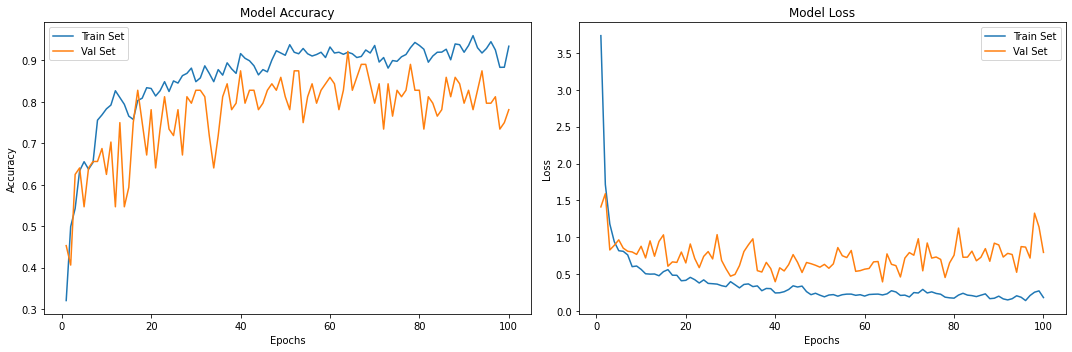

In [ ]:
acc = vgg.history['accuracy']
val_acc = vgg.history['val_accuracy']
loss = vgg.history['loss']
val_loss = vgg.history['val_loss']
epochs_range = range(1, len(vgg.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

In [ ]:
###VGG19
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.optimizers import SGD
import cv2, numpy as np
 

In [ ]:
from keras.applications.vgg19 import VGG19
model = VGG19()

574726144/574710816 [==============================] - 7s 0us/step


In [ ]:

from keras.applications.vgg19 import VGG19
model = VGG19()
print(model.summary())

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
tf.keras.applications.VGG19(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)

In [ ]:
NUM_CLASSES = 4
from tensorflow.keras import layers
vgg1_model = Sequential()
vgg1_model.add(base_model)
vgg1_model.add(layers.Flatten())
vgg1_model.add(layers.Dropout(0.25))
vgg1_model.add(layers.Dense(NUM_CLASSES, activation='sigmoid'))

vgg1_model.layers[0].trainable = False

vgg1_model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

vgg1_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 10, 10, 512)       14714688  
                                                                 
 flatten_4 (Flatten)         (None, 51200)             0         
                                                                 
 dropout_6 (Dropout)         (None, 51200)             0         
                                                                 
 dense_6 (Dense)             (None, 4)                 204804    
                                                                 
Total params: 14,919,492
Trainable params: 204,804
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
mc = ModelCheckpoint(
    filepath="./ct_vgg_best_model.hdf5",
    monitor= 'val_accuracy', 
    verbose= 1,
    save_best_only= True, 
    mode = 'auto'
    );

call_back = [ mc];



In [ ]:
vgg1 = vgg1_model.fit(
    train_data, 
    steps_per_epoch = train_data.samples//train_data.batch_size, 
    epochs = 15, 
    validation_data = val_data, 
    validation_steps = val_data.samples//val_data.batch_size,
    callbacks = call_back 
    )

Epoch 1/15
9/9 [==============================] - ETA: 0s - loss: 2.8636 - accuracy: 0.3024
Epoch 1: val_accuracy improved from -inf to 0.40625, saving model to ./ct_vgg_best_model.hdf5
9/9 [==============================] - 21s 2s/step - loss: 2.8636 - accuracy: 0.3024 - val_loss: 2.6396 - val_accuracy: 0.4062
Epoch 2/15
9/9 [==============================] - ETA: 0s - loss: 1.6170 - accuracy: 0.4757
Epoch 2: val_accuracy improved from 0.40625 to 0.46875, saving model to ./ct_vgg_best_model.hdf5
9/9 [==============================] - 20s 2s/step - loss: 1.6170 - accuracy: 0.4757 - val_loss: 1.3395 - val_accuracy: 0.4688
Epoch 3/15
9/9 [==============================] - ETA: 0s - loss: 1.2005 - accuracy: 0.5137
Epoch 3: val_accuracy improved from 0.46875 to 0.48438, saving model to ./ct_vgg_best_model.hdf5
9/9 [==============================] - 19s 2s/step - loss: 1.2005 - accuracy: 0.5137 - val_loss: 1.4293 - val_accuracy: 0.4844
Epoch 4/15
9/9 [==============================] - ETA: 

In [ ]:
model = load_model("./ct_vgg_best_model.hdf5")

In [ ]:
# Checking the Accuracy of the Model 
accuracy_vgg1 = model.evaluate_generator(generator= test_data)[1] 
print(f"The accuracy of the model is = {accuracy_vgg1*100} %")

The accuracy of the model is = 71.11111283302307 %


In [ ]:
vgg1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

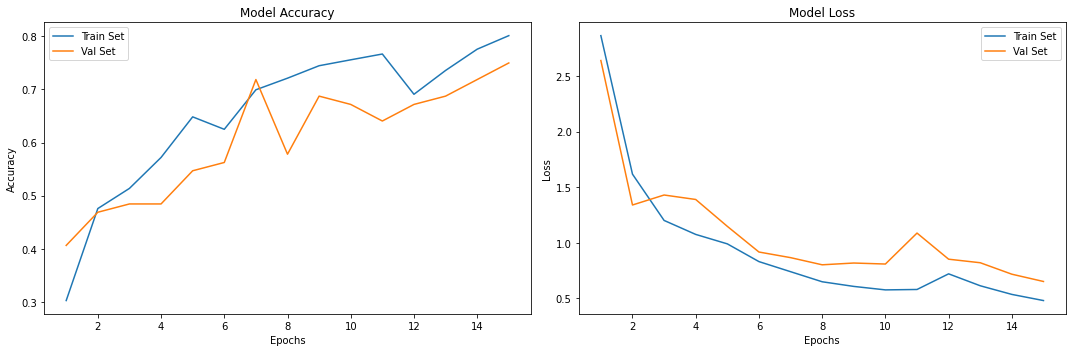

In [ ]:
acc1 = vgg1.history['accuracy']
val1_acc = vgg1.history['val_accuracy']
loss1 = vgg1.history['loss']
val1_loss = vgg1.history['val_loss']
epochs_range = range(1, len(vgg1.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc1, label='Train Set')
plt.plot(epochs_range, val1_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss1, label='Train Set')
plt.plot(epochs_range, val1_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

In [ ]:
##Inceptionv3 Model

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

base_model = InceptionV3(input_shape = (350, 350, 3), 
                         include_top = False, 
                         weights = 'imagenet')

87924736/87910968 [==============================] - 2s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
x = layers.Flatten()(base_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)

In [ ]:
# Add a final sigmoid layer with 4 node for classification output
x = layers.Dense(4, activation='sigmoid')(x)

model_incep = tf.keras.models.Model(base_model.input, x)

model_incep.compile(optimizer = tensorflow.keras.optimizers.RMSprop(learning_rate=0.0001), 
                    loss = 'categorical_crossentropy', 
                    metrics = ['accuracy'])

In [ ]:
# Adding Model check point Callback

mc = ModelCheckpoint(
    filepath="./ct_incep_best_model.hdf5",
    monitor= 'val_accuracy', 
    verbose= 1,
    save_best_only= True, 
    mode = 'auto'
    );

call_back = [mc];

In [ ]:
# Fitting the Model
incep = model_incep.fit(
    train_data, 
    steps_per_epoch = train_data.samples//train_data.batch_size, 
    epochs = 15, 
    validation_data = val_data, 
    validation_steps = val_data.samples//val_data.batch_size,
    callbacks = call_back 
    )

Epoch 1/15
9/9 [==============================] - ETA: 0s - loss: 27.4938 - accuracy: 0.3352
Epoch 1: val_accuracy improved from -inf to 0.43750, saving model to ./ct_incep_best_model.hdf5
9/9 [==============================] - 33s 3s/step - loss: 27.4938 - accuracy: 0.3352 - val_loss: 8.5482 - val_accuracy: 0.4375
Epoch 2/15
9/9 [==============================] - ETA: 0s - loss: 5.1332 - accuracy: 0.4699
Epoch 2: val_accuracy did not improve from 0.43750
9/9 [==============================] - 17s 2s/step - loss: 5.1332 - accuracy: 0.4699 - val_loss: 2.5434 - val_accuracy: 0.4062
Epoch 3/15
9/9 [==============================] - ETA: 0s - loss: 4.7357 - accuracy: 0.4608
Epoch 3: val_accuracy did not improve from 0.43750
9/9 [==============================] - 17s 2s/step - loss: 4.7357 - accuracy: 0.4608 - val_loss: 7.9323 - val_accuracy: 0.4219
Epoch 4/15
9/9 [==============================] - ETA: 0s - loss: 4.1954 - accuracy: 0.5173
Epoch 4: val_accuracy improved from 0.43750 to 0.51

In [ ]:
# Loading the Best Fit Model 
model = load_model("./ct_incep_best_model.hdf5")

In [ ]:
# Checking the Accuracy of the Model 
accuracy_incep = model.evaluate_generator(generator= test_data)[1] 
print(f"The accuracy of the model is = {accuracy_incep*100} %")

The accuracy of the model is = 67.30158925056458 %


In [ ]:
incep.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

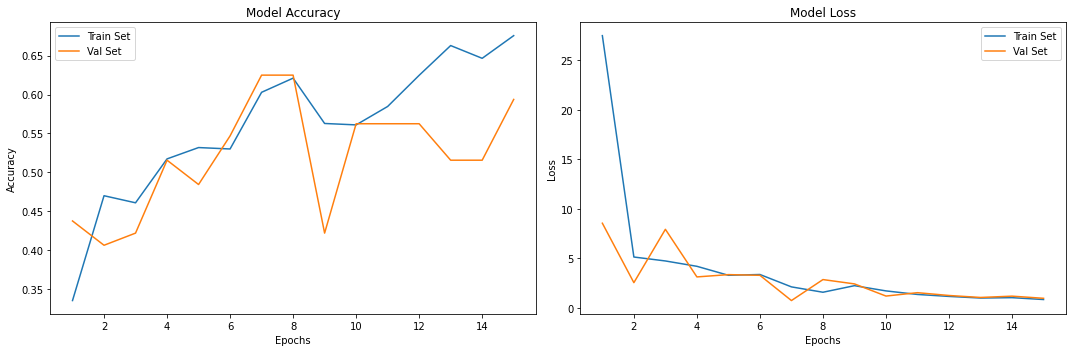

In [ ]:
# Plot model performance
acc = incep.history['accuracy']
val_acc = incep.history['val_accuracy']
loss = incep.history['loss']
val_loss = incep.history['val_loss']
epochs_range = range(1, len(incep.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()


In [ ]:
#####RestNet50 Model

In [ ]:
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(input_shape=(350, 350,3),
                      include_top=False, weights="imagenet", 
                      pooling='max')

94781440/94765736 [==============================] - 2s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
model_resnet = Sequential()
model_resnet.add(base_model)
model_resnet.add(Dense(4, activation='sigmoid'))

In [ ]:
model_resnet.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.0001), 
                     loss = 'categorical_crossentropy', 
                     metrics = ['accuracy'])

In [ ]:
# Adding Model check point Callback

mc = ModelCheckpoint(
    filepath="./ct_resnet_best_model.hdf5",
    monitor= 'val_accuracy', 
    verbose= 1,
    save_best_only= True, 
    mode = 'auto'
    );

call_back = [mc];

In [ ]:
# Fitting the Model
resnet = model_resnet.fit(
    train_data, 
    steps_per_epoch = train_data.samples//train_data.batch_size, 
    epochs = 30, 
    validation_data = val_data, 
    validation_steps = val_data.samples//val_data.batch_size,
    callbacks = call_back 
    )

Epoch 1/30
9/9 [==============================] - ETA: 0s - loss: 1.2384 - accuracy: 0.4353
Epoch 1: val_accuracy did not improve from 0.37500
9/9 [==============================] - 19s 2s/step - loss: 1.2384 - accuracy: 0.4353 - val_loss: 1.3336 - val_accuracy: 0.3125
Epoch 2/30
9/9 [==============================] - ETA: 0s - loss: 1.2262 - accuracy: 0.4845
Epoch 2: val_accuracy improved from 0.37500 to 0.40625, saving model to ./ct_resnet_best_model.hdf5
9/9 [==============================] - 19s 2s/step - loss: 1.2262 - accuracy: 0.4845 - val_loss: 1.3183 - val_accuracy: 0.4062
Epoch 3/30
9/9 [==============================] - ETA: 0s - loss: 1.2160 - accuracy: 0.4681
Epoch 3: val_accuracy did not improve from 0.40625
9/9 [==============================] - 19s 2s/step - loss: 1.2160 - accuracy: 0.4681 - val_loss: 1.2941 - val_accuracy: 0.3594
Epoch 4/30
9/9 [==============================] - ETA: 0s - loss: 1.2182 - accuracy: 0.4608
Epoch 4: val_accuracy did not improve from 0.4062

In [ ]:
 # Loading the Best Fit Model 
model = load_model("./ct_resnet_best_model.hdf5")

In [ ]:
# Checking the Accuracy of the Model 
accuracy_resnet = model.evaluate_generator(generator= test_data)[1] 
print(f"The accuracy of the model is = {accuracy_resnet*100} %")

The accuracy of the model is = 40.95238149166107 %


In [ ]:
resnet.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

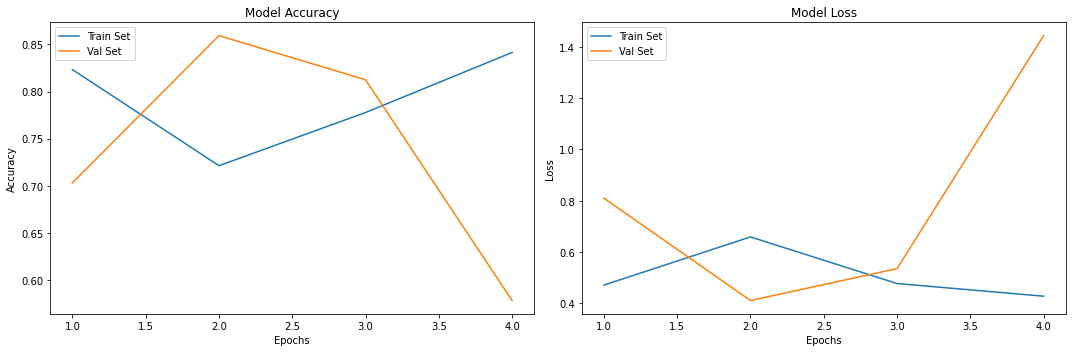

In [ ]:
# Plot model performance
acc = resnet.history['accuracy']
val_acc = resnet.history['val_accuracy']
loss = resnet.history['loss']
val_loss = resnet.history['val_loss']
epochs_range = range(1, len(resnet.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

In [ ]:
#####Comparison

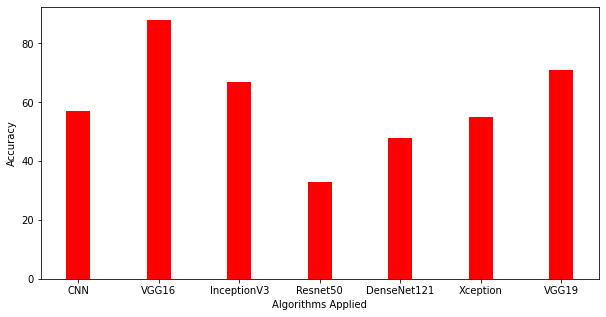

In [ ]:
algos = ['CNN', 'VGG16', 'InceptionV3', 'Resnet50','DenseNet121','Xception','VGG19']
accuracy = [accuracy_cnn, accuracy_vgg, accuracy_incep, accuracy_resnet, accuracy_xception, accuracy_densenet121, accuracy_vgg1]
accuracy = np.floor([i * 100 for i in accuracy])
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(algos, accuracy, color ='red', width = 0.3)
 
plt.xlabel("Algorithms Applied")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
########PREDICTION

In [ ]:

def chestScanPrediction(path, _model):
    classes_dir = ["Adenocarcinoma","Large cell carcinoma","Normal","Squamous cell carcinoma"]
    # Loading Image
    img = image.load_img(path, target_size=(350,350))
    # Normalizing Image
    norm_img = image.img_to_array(img)/255
    # Converting Image to Numpy Array
    input_arr_img = np.array([norm_img])
    # Getting Predictions
    pred = np.argmax(_model.predict(input_arr_img))
    # Printing Model Prediction
    print(classes_dir[pred])

In [ ]:
path = "/content/drive/MyDrive/image dataset/Data/test/large.cell.carcinoma/000111 (2).png"
chestScanPrediction(path,model_incep)

NameError: ignored

In [ ]:
path = "/content/drive/MyDrive/image dataset/Data/test/large.cell.carcinoma/000127 (2).png"
chestScanPrediction(path,model_incep)

Large cell carcinoma


In [ ]:
path = "/content/drive/MyDrive/image dataset/Data/test/large.cell.carcinoma/000130.png"
chestScanPrediction(path,model_incep)

Large cell carcinoma


In [ ]:
path = "/content/drive/MyDrive/image dataset/Data/train/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa/000004 (4).png"
chestScanPrediction(path,model_incep)

Squamous cell carcinoma


In [ ]:
path = "/content/drive/MyDrive/image dataset/Data/train/normal/10.png"
chestScanPrediction(path,model_incep)

Normal


In [ ]:
path = "/content/drive/MyDrive/image dataset/Data/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib/000013 (4).png"
chestScanPrediction(path,model_incep)

Large cell carcinoma
